In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv',parse_dates=['Date'])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape

(18249, 14)

We can see that there are 18249 rows that means 18249 Avocado data.

14 Columns that means 14 Attributes.

Average Price is our Targwr Attribute.

As we know price iS a continuous value so It is a Regression type of Problem

In [4]:
#Checking data types
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Region and Type are object data type.

We have one attribute of Date Time Datatype.

We have also year in Dataset

All the other datas are float64 or int64

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are No Null Values Present in Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


We Can get the short sumery of the Avocado Dataset

In [7]:
#Adding Date,Month and Year Column to get the better insight
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

In [8]:
## Dropping the Unnecessary COlumns
df.drop(['Unnamed: 0','Date','year'],axis=1,inplace=True)

## I have dropped the columns Unnamed: 0 because it is just a counting number which has no significance in prediction

## I have droppend date column because we have extracted the Day, Month, Year seperatly from Date column.

## I have dropped year column because we get same columns Year  feature Extraction from our Date Column.

In [9]:
df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,Albany,2015,11,22
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,Albany,2015,11,15
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,Albany,2015,11,8
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,Albany,2015,11,1
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,Albany,2015,10,25


In [10]:
# Grouping datasets to make it the data frame easy to understand
group=df.groupby(['Year','Month'])
group.first()

AveragePrice  Total Volume      4046       4225     4770  \
Year Month                                                             
2015 1              1.06      45147.50    941.38   33196.16   164.14   
     2              1.07      45675.05   1088.38   35056.13   151.00   
     3              1.02      67799.08   1402.28   58623.22    89.50   
     4              1.22      49585.46    875.65   35841.75    89.62   
     5              1.23      95123.62    922.37   70469.69    50.55   
     6              1.37      89534.81    664.23   57545.79  4662.71   
     7              1.11     106757.10    648.75   91949.05   966.61   
     8              1.07     105693.84    689.01   94362.67   335.43   
     9              0.99     106803.39   1204.88   99409.21   154.84   
     10             1.07      74338.76    842.40   64757.44   113.00   
     11             1.28      51039.60    941.48   43838.39    75.78   
     12             1.33      64236.62   1036.74   54454.85    48.16   
2016 1              1.16     102038.32   1386.24   79881.67    69.46   
     2              1.26      87822.43    805.41   72159.95    63.13   
     3              1.49      92529.27    808.50   78146.18    36.73   
     4              1.18     102490.20    954.60   87571.23    43.15   
     5              1.49     127812.25   2580.77  104876.94   103.64   
     6              1.50     133086.66   7923.01  106656.84    37.42   
     7              1.61     125586.57   9293.65   96915.41    25.46   
     8              1.18     145323.22  34912.97   94928.79    53.85   
     9              1.62      96853.15   7658.55   79425.81    43.25   
     10             1.46      58375.10   3187.14   45898.52    54.31   
     11             1.52      58171.89   2793.99   47106.18    18.14   
     12             1.52      73341.73   3202.39   58280.33   426.92   
2017 1              1.31      95424.59   3844.62   78315.15   484.56   
     2              1.40      88371.09   3190.28   73959.76    71.20   
     3              1.16     122951.65   3184.29  100854.22    70.17   
     4              1.13     124926.39   2573.11   99451.52    81.89   
     5              1.80     121869.11   2345.65  106690.16   105.74   
     6              1.53      89303.04   2224.67   74282.58   129.85   
     7              1.61      83599.96   1915.81   73287.66   321.62   
     8              1.61      75471.56   2156.20   59831.83    71.46   
     9              1.64      68539.64   2508.62   56023.16    74.82   
     10             1.67      69432.23   2959.76   57585.49    57.94   
     11             1.50      62977.00   2413.00   49076.00    62.00   
     12             1.47     113514.42   2622.70  101135.53    20.25   
2018 1              1.57      93625.03   3101.17   74627.23    55.59   
     2              1.28     104278.89  10368.77   59723.32    48.00   
     3              1.57     149396.50  16361.69  109045.03    65.45   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Year Month                                                                  
2015 1        10845.82    10103.35      742.47         0.00  conventional   
     2         9379.54     9000.16      379.38         0.00  conventional   
     3         7684.08     7208.49      475.59         0.00  conventional   
     4        12778.44    12076.83      701.61         0.00  conventional   
     5        23681.01    23222.49      458.52         0.00  conventional   
     6        26662.08    26311.76      350.32         0.00  conventional   
     7        13192.69    13061.53      131.16         0.00  conventional   
     8        10306.73    10218.93       87.80         0.00  conventional   
     9         6034.46     5888.87      145.59         0.00  conventional   
     10        8625.92     8061.47      564.45         0.00  conventional   
     11        6183.95     5986.26      197.69         0.00  conventional   
     12        8696.87     8603.62       93.25         0.0

We can see that there are 4year data available.



In [11]:
group1=df.groupby(['region'])
group1.first()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month,day
region,,,,,,,,,,,,,
Albany,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,12,27
Atlanta,0.99,386100.49,292097.36,27350.92,297.90,66354.31,48605.95,17748.36,0.00,conventional,2015,12,27
BaltimoreWashington,1.17,596819.40,40450.49,394104.02,17353.79,144911.10,142543.88,2367.22,0.00,conventional,2015,12,27
Boise,0.97,62909.69,30482.25,2971.94,5894.40,23561.10,23520.19,5.69,35.22,conventional,2015,12,27
Boston,1.13,450816.39,3886.27,346964.70,13952.56,86012.86,85913.60,99.26,0.00,conventional,2015,12,27
BuffaloRochester,1.35,96233.08,1367.81,39542.83,85.76,55236.68,55236.68,0.00,0.00,conventional,2015,12,27
California,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,12,27
Charlotte,0.96,156698.24,33070.27,62956.24,23041.69,37630.04,35130.42,2499.62,0.00,conventional,2015,12,27
Chicago,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,12,27


Listing Region wise Alphabatical

In [12]:
#Statistical analysis
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


We can see that Column 4046, 4225,4770,Total Bags,Small Bags,Large Bags,XLarge bags have minimum values as Zero

Target Attribute AveragePrice is Normally Distributed.

### Visualization

In [13]:
#importing Libraris
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Null Values'}>

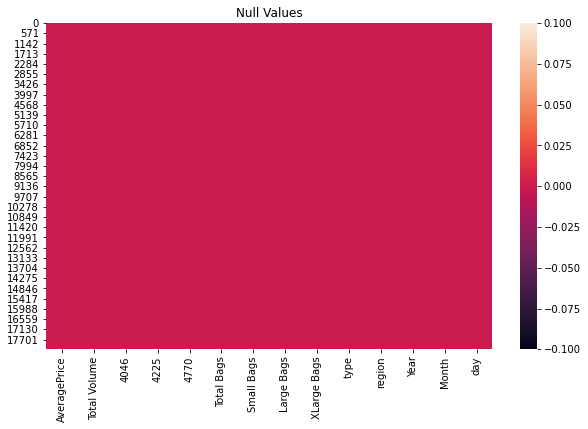

In [14]:
#Null Values using Heatmap
plt.figure(figsize=(10,6))
plt.title('Null Values')
sns.heatmap(df.isnull())

As we know already there are No Null Values

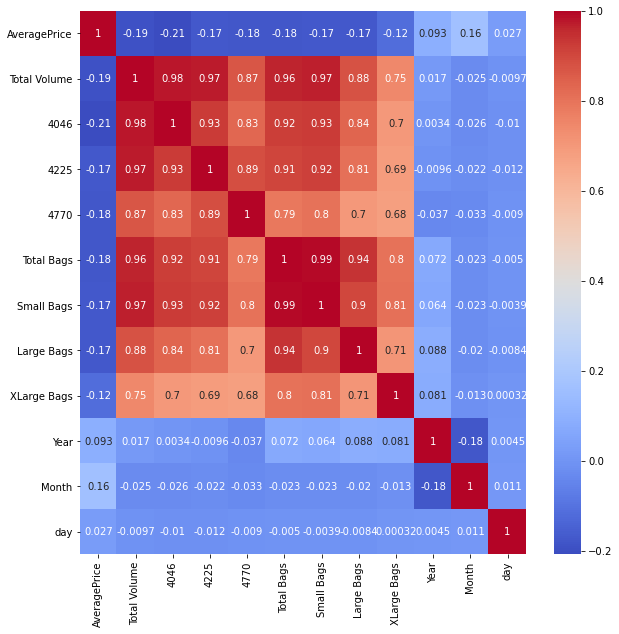

In [15]:
#Checking Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [16]:
corr=df.corr()
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
Month           0.162409
Year            0.093197
day             0.027386
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

Month,Year,Day are date data so their correlation is irrevalent.

All the other columns have Negative correlation with Target

<AxesSubplot:title={'center':'Coreelation with Target'}>

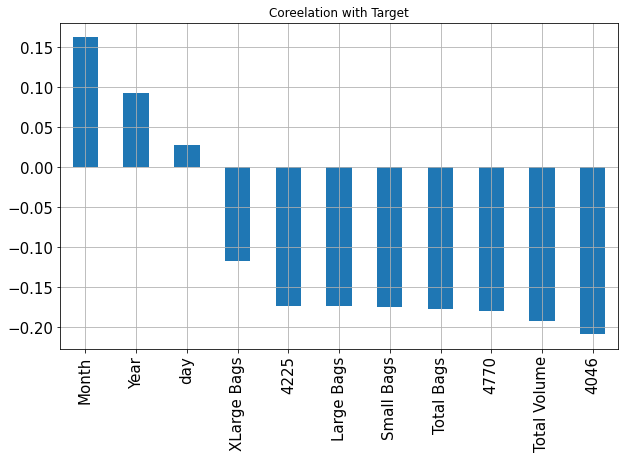

In [17]:
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot.bar(figsize=(10,6),grid=True,title='Coreelation with Target',fontsize=15)

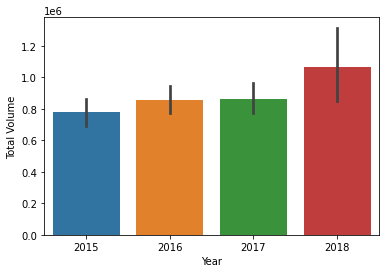

In [18]:
sns.barplot(x='Year',y='Total Volume',data=df)
plt.show()

As we can see that Production is Increased Along with year.

<AxesSubplot:title={'center':'Price tread over the Year'}, xlabel='Year', ylabel='AveragePrice'>

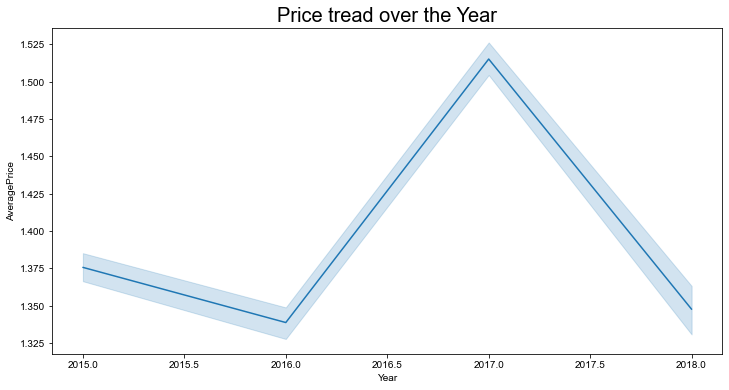

In [19]:
plt.figure(figsize=(12,6))
plt.title('Price tread over the Year',fontsize=20)
sns.set_style('whitegrid')
sns.lineplot(df['Year'],df['AveragePrice'],data=df)

As we can see that there is a decrease of Avocado price from 2015 to 2016.

From 2016 to 2017 prices increase.

Highest Price in 2017

After 2017 there o drop of prices

<AxesSubplot:title={'center':'Price tread Monthly'}, xlabel='Month', ylabel='AveragePrice'>

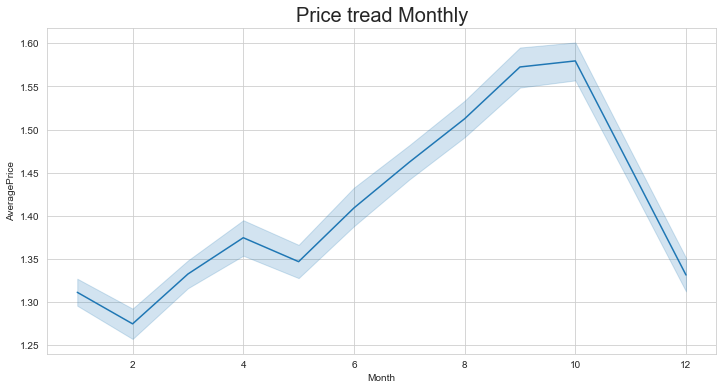

In [20]:
plt.figure(figsize=(12,6))
plt.title('Price tread Monthly',fontsize=20)
sns.set_style('whitegrid')
sns.lineplot(df['Month'],df['AveragePrice'],data=df)

Avocado prices are high in August to September

<AxesSubplot:title={'center':'Areawise Sales of Avacado in US'}, xlabel='region'>

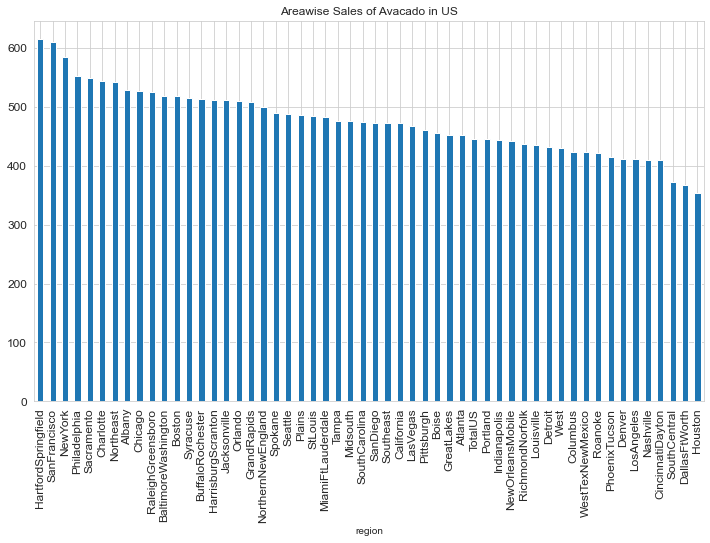

In [21]:
df.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(12,7),title='Areawise Sales of Avacado in US',fontsize=12)

Hartford Spring Field and san Francisco have Sales of Avocados

<AxesSubplot:title={'center':' Price of Avacado in US'}, xlabel='region'>

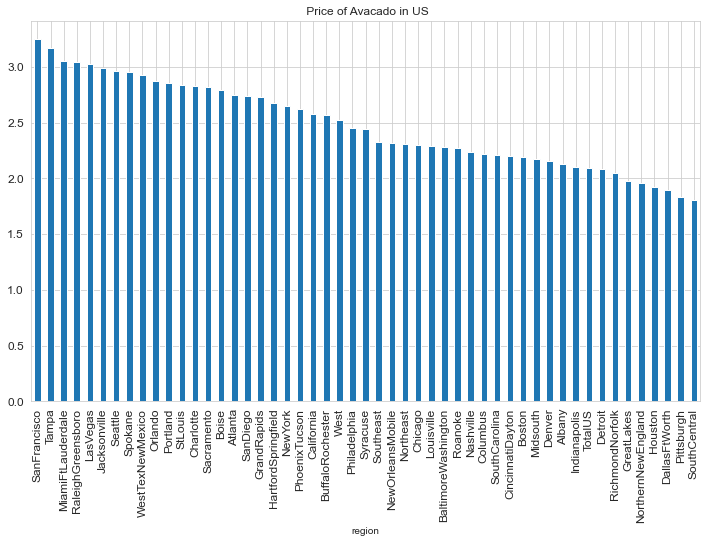

In [22]:
df.groupby('region')['AveragePrice'].max().sort_values(ascending=False).drop_duplicates().plot(kind='bar',figsize=(12,7),title=' Price of Avacado in US',fontsize=12)

We can see that San Francisco has highest price of Avocado and South Central has the lowest price of Avocado in US.

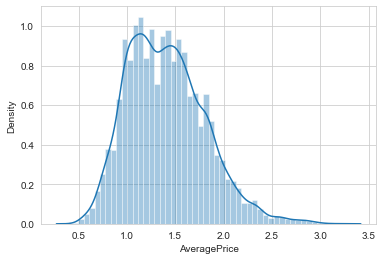

In [23]:
sns.distplot(a=df.AveragePrice, kde=True)
plt.show()

Target Variable is almost Normally Distributed

# Checking Data Distribution

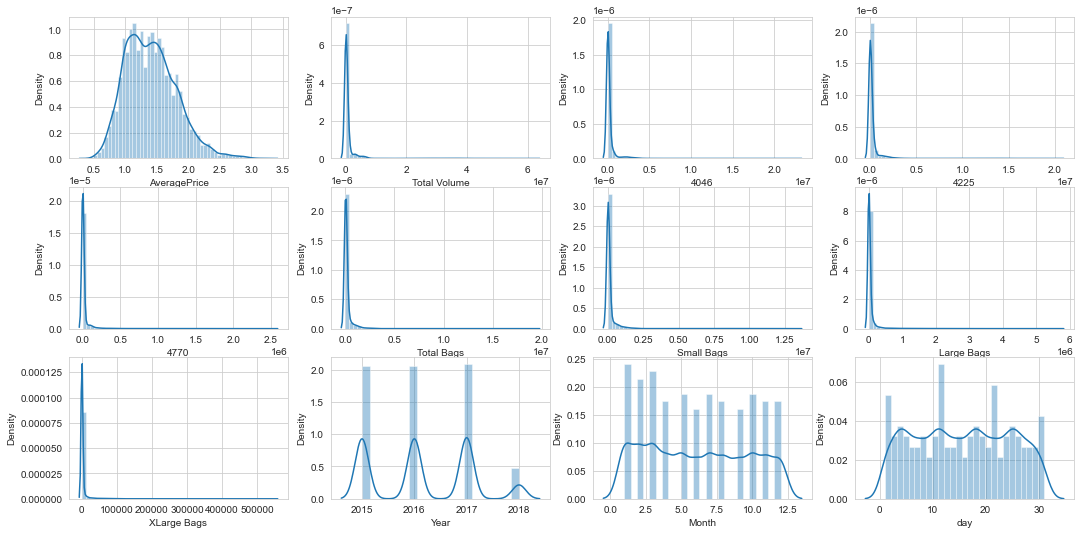

In [24]:
df_obj=df.select_dtypes(exclude='object')
plt.figure(figsize=(18,12))
plot=1
for col in df_obj:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

Target Variable is almost Normally Distributed

TotalVolume,4046,4225,4770,Total bags,Small Bags,Large Bags,Xlarge Bags are Right Skewd.

All The Right Skewed data Majority value is Zero

# Checking Outliers

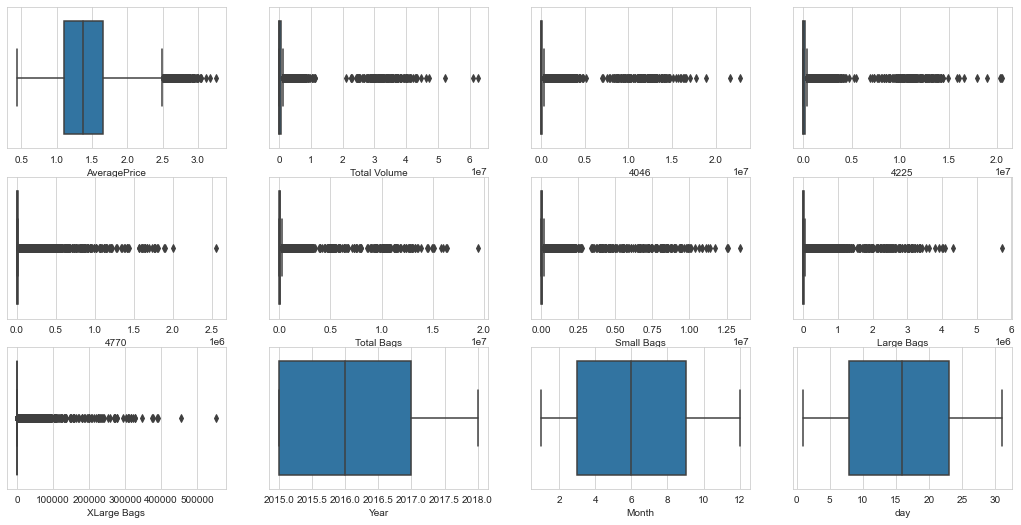

In [25]:
plt.figure(figsize=(18,12))
plot=1
for col in df_obj:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

There are Huge Ammount of Outliers present

In [26]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [27]:
#Removing Outliers Using IQR
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    df.loc[df[col]>upper_limit,col]=upper_limit
    sns.boxplot(df[col])

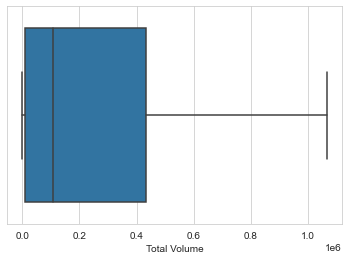

In [28]:
replace_outlier(df,'Total Volume')

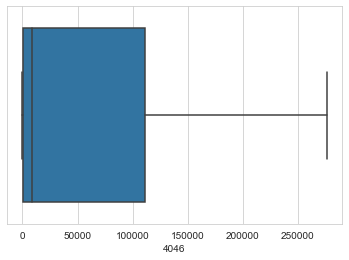

In [29]:
replace_outlier(df,'4046')

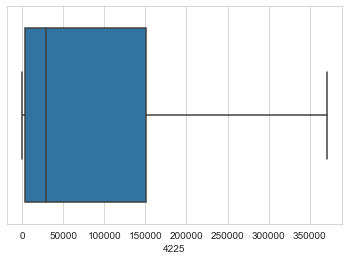

In [30]:
replace_outlier(df,'4225')

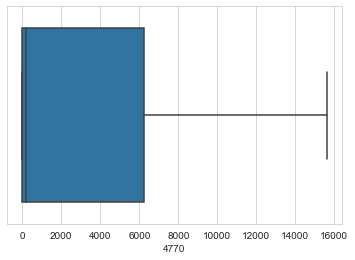

In [31]:
replace_outlier(df,'4770')

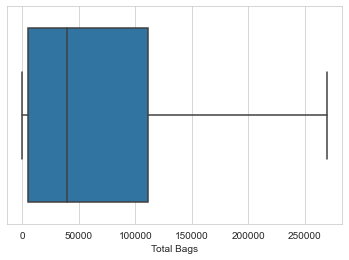

In [32]:
replace_outlier(df,'Total Bags')

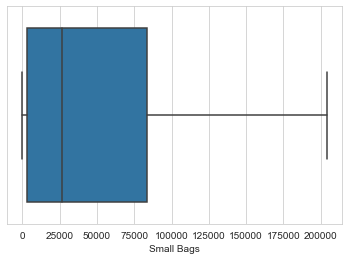

In [33]:
replace_outlier(df,'Small Bags')

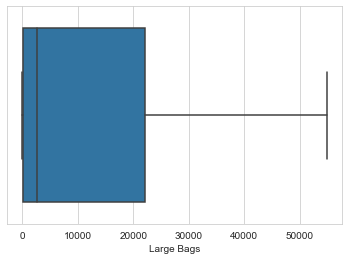

In [34]:
replace_outlier(df,'Large Bags')

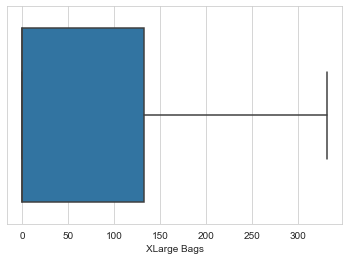

In [35]:
replace_outlier(df,'XLarge Bags')

# Checking Skewness

In [36]:
df.skew()

AveragePrice    0.580303
Total Volume    1.206542
4046            1.251184
4225            1.219271
4770            1.212184
Total Bags      1.158550
Small Bags      1.186103
Large Bags      1.215301
XLarge Bags     1.175351
Year            0.215339
Month           0.106617
day             0.014310
dtype: float64

In [37]:
#Removing Skewness
for i in df_obj:
    if df[i].skew()>0.55:
        df[i]=np.log1p(df[i])

In [38]:
df.skew()

AveragePrice    0.138629
Total Volume   -0.286615
4046           -0.640200
4225           -0.811019
4770           -0.101183
Total Bags     -0.708210
Small Bags     -1.085408
Large Bags     -0.765295
XLarge Bags     0.868396
Year            0.215339
Month           0.106617
day             0.014310
dtype: float64

Skewness Removed

# Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])

Encoded the Categorical Region Column

# Splitting Data into Input and Output Variable

In [40]:
x=df.drop(['AveragePrice'],axis=1)
y=df[['AveragePrice']]

# Scaling The Input Data

In [41]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,-0.050181,-0.602502,0.457831,-0.244967,-0.475548,-0.203518,-0.663842,-0.684528,-0.999836,-1.700252,-1.221282,1.647632,1.291857
1,-0.126566,-0.741391,0.382684,-0.195804,-0.431485,-0.165400,-0.651678,-0.684528,-0.999836,-1.700252,-1.221282,1.647632,0.494231
2,0.245688,-0.688348,0.720720,0.012292,-0.508015,-0.232294,-0.636258,-0.684528,-0.999836,-1.700252,-1.221282,1.647632,-0.303396
3,0.050115,-0.574114,0.563299,-0.139522,-0.675344,-0.380783,-0.565004,-0.684528,-0.999836,-1.700252,-1.221282,1.647632,-1.101022
4,-0.161728,-0.633626,0.375843,-0.128391,-0.644533,-0.358194,-0.457678,-0.684528,-0.999836,-1.700252,-1.221282,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.692844,-0.382762,-0.892643,-1.263381,-0.257681,-0.025305,-0.242434,-0.684528,1.000164,1.700811,1.970504,-1.181997,-1.328915
18245,-0.793039,-0.557515,-0.587202,-1.263381,-0.444197,-0.187161,-0.320971,-0.684528,1.000164,1.700811,1.970504,-1.464959,1.405803
18246,-0.797293,-0.557455,-0.714104,0.460067,-0.437330,-0.167958,-0.878789,-0.684528,1.000164,1.700811,1.970504,-1.464959,0.608177
18247,-0.718197,-0.477301,-0.640389,0.459733,-0.360497,-0.101864,-0.833608,-0.684528,1.000164,1.700811,1.970504,-1.464959,-0.189449


# Feature importance

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

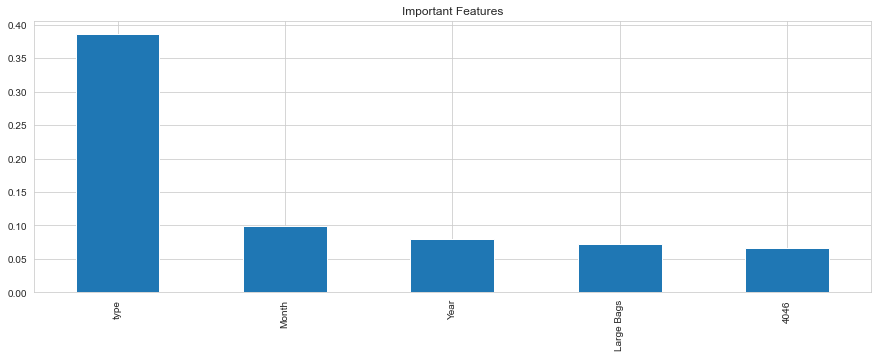

In [43]:
plt.figure(figsize=(15,5))
plt.title('Important Features',fontsize=12)
importance=pd.Series(extra.feature_importances_,index=x.columns)
importance.nlargest().plot(kind='bar')
plt.show()

# Model Building

In [44]:
#Importing machine learning Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [45]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

max r2 score corresponding to 50 is 0.5759563568319088


cross validation score 0.22352286767552068


Training accuracy 0.5615736689019768


Test Accuracy 0.5489141716117009


MAE 0.08701073624267201


MSE 0.01208797971377955


RMSE 0.10994534875918831




50

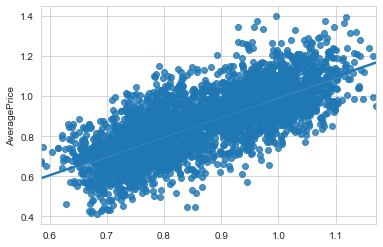

In [46]:
#LINERAR REGRESSION
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 50 is 0.5759560608772567


cross validation score 0.22362088894759286


Training accuracy 0.5615735854412081


Test Accuracy 0.5489082608273184


MAE 0.08701237382691687


MSE 0.012088138108118748


RMSE 0.10994606908897993




50

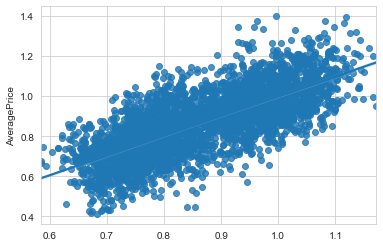

In [47]:
#Ridge
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 62 is 0.805938838956163


cross validation score -0.27026500098514145


Training accuracy 1.0


Test Accuracy 0.7744928007917238


MAE 0.05169171437167319


MSE 0.00604303278398359


RMSE 0.07773694606802863




62

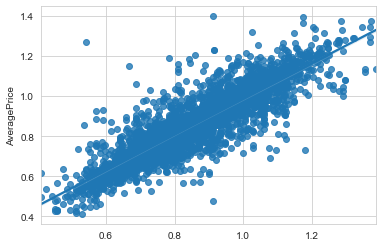

In [48]:
#Decision Tree
dtr=DecisionTreeRegressor()
maxr2_score(dtr,x,y)

max r2 score corresponding to 76 is 0.8148482312181626


cross validation score 0.060187030330746974


Training accuracy 0.8712347756956992


Test Accuracy 0.7913315906479349


MAE 0.055096799316957844


MSE 0.005591795043011461


RMSE 0.07477830596510902




76

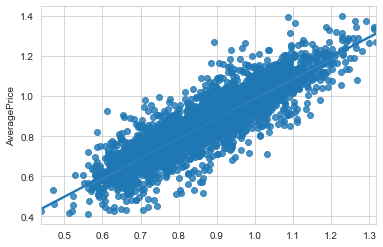

In [49]:
#KNN
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

K-Nearest Neighbours gives us a Maximun R2 score. 

# Hyperparameter Tuning

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92,test_size=.20)
param={'n_neighbors':range(5,21),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree'],'n_jobs':[-1]}
glf=GridSearchCV(knn,param,scoring='r2')
glf.fit(x_train,y_train)
glf.best_params_

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}

In [53]:
knn_r=KNeighborsRegressor(algorithm='auto',n_jobs=-1,n_neighbors=5,weights='distance')
knn_r.fit(x_train,y_train)
pred=knn_r.predict(x_test)
print('Training accuracy',knn_r.score(x_train,y_train))
print('Testing Accuracy',knn_r.score(x_test,y_test))
print('MAE',mean_absolute_error(y_test,pred))
print('\n')
print('MSE',mean_squared_error(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('\n')
print('R2 Score',r2_score(pred,y_test))

Training accuracy 1.0
Testing Accuracy 0.8010743598027323
MAE 0.05539938765757031


MSE 0.0055884864078102675


RMSE 0.07475617972990774


R2 Score 0.7458865380655977


We can see that by Hyperparameter tuning our Training and Test both accuracy has improved.

mean absolute error,Root mean squared error also decrease from earlier hence we will save this as our best model.

In [ ]:
Model